In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from utils import FAST, corner_orientations, BRIEF, match
from time import time

%matplotlib inline

me:  0.6071529388427734
cv:  0.0
my keypoints:  290 
cv keypoints:  1532
corner orientations
orientations time:  1.9017517566680908


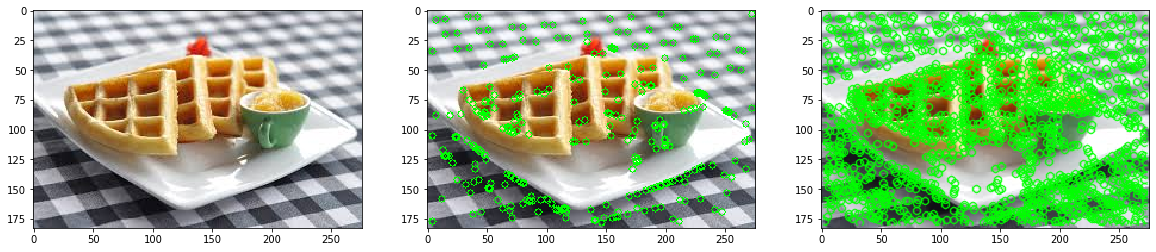

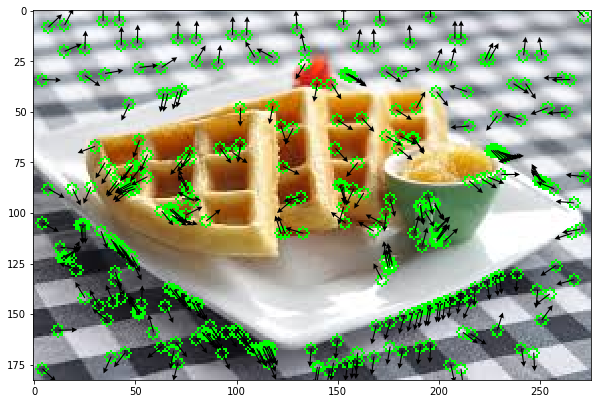

In [2]:
img = cv2.imread('images/waffle.jpg')
original_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

t1 = time()
keypoints = FAST(gray, N=12, threshold=0.15, nms_window=3)
print('me: ', time()-t1)
features_img = np.copy(img)

for keypoint in keypoints:
    features_img = cv2.circle(features_img, tuple(keypoint), 3, (0,255,0), 1)
# features_img[keypoints] = [0,255,0]

fig = plt.figure(figsize=(20,30))
plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(features_img)


# using cv2

t2 = time()
fast_cv2 = cv2.FastFeatureDetector_create()
kp = fast_cv2.detect(img, None)
print('cv: ', time()-t2)

img_cv = img
img_cv = cv2.drawKeypoints(img, kp, img_cv, color=(0,255,0))

plt.subplot(1,3,3)
plt.imshow(img_cv)

print('my keypoints: ', len(keypoints), '\ncv keypoints: ', len(kp))

print('corner orientations')
t3 = time()
orientations = corner_orientations(gray, keypoints)
print('orientations time: ', time()-t3)
# print(np.rad2deg(orientations))

plt.figure(figsize=(10,20))
plt.imshow(features_img)
for i in range(keypoints.shape[0]):
    plt.quiver(keypoints[i, 0], keypoints[i, 1], np.cos(orientations[i]), np.sin(orientations[i]), 
               width=0.002, headwidth=5, scale=30)

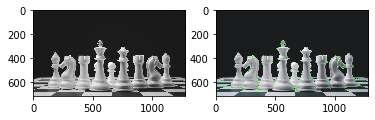

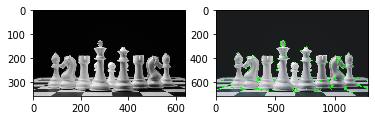

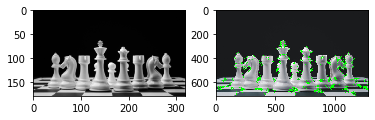

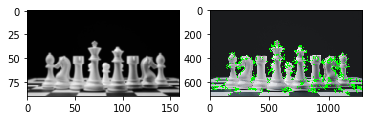

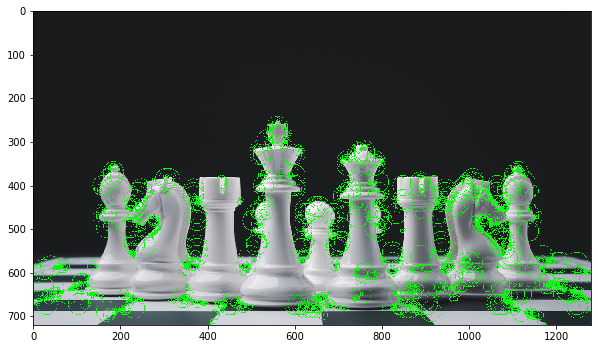

In [3]:
img = cv2.imread('images/chess.jpg')
original_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

gray_2 = cv2.pyrDown(gray)
gray_4 = cv2.pyrDown(gray_2)
gray_8 = cv2.pyrDown(gray_4)

scales = [1, 2, 4, 8]
grays = [gray, gray_2, gray_4, gray_8]
features_img = np.copy(img)
for i in range(len(scales)):
    keypoints = FAST(grays[i], N=9, threshold=0.15, nms_window=3)
    for keypoint in keypoints:
        features_img = cv2.circle(features_img, tuple(keypoint*scales[i]), 3*scales[i], (0,255,0), 1)
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(grays[i], cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(features_img)
    
plt.figure(figsize=(10,30))
plt.imshow(features_img)

me:  10.81947636604309
cv:  0.0019326210021972656
my keypoints:  256 
cv keypoints:  2411
corner orientations
orientations time:  1.670027256011963


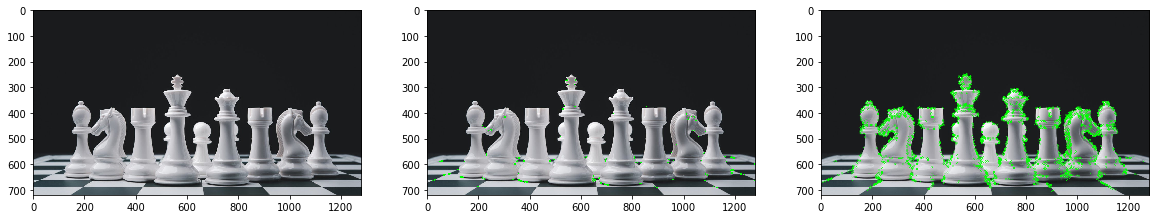

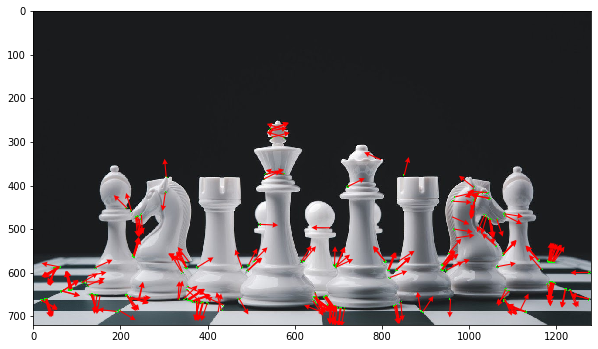

In [4]:
img = cv2.imread('images/chess.jpg')
original_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

t1 = time()
keypoints = FAST(gray, N=12, threshold=0.15, nms_window=3)
print('me: ', time()-t1)
features_img = np.copy(img)
for keypoint in keypoints:
    features_img = cv2.circle(features_img, tuple(keypoint), 3, (0,255,0), 1)

fig = plt.figure(figsize=(20,30))
plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(features_img)


# using cv2

t2 = time()
fast_cv2 = cv2.FastFeatureDetector_create()
kp = fast_cv2.detect(img, None)
print('cv: ', time()-t2)

img_cv = img
img_cv = cv2.drawKeypoints(img, kp, img_cv, color=(0,255,0))

plt.subplot(1,3,3)
plt.imshow(img_cv)

print('my keypoints: ', len(keypoints), '\ncv keypoints: ', len(kp))

print('corner orientations')
t3 = time()
orientations = corner_orientations(gray, keypoints)
print('orientations time: ', time()-t3)
# print(np.rad2deg(orientations))

plt.figure(figsize=(10,30))
plt.imshow(features_img)
for i in range(keypoints.shape[0]):
    plt.quiver(keypoints[i, 0], keypoints[i, 1], np.cos(orientations[i]), np.sin(orientations[i]), 
               width=0.002, headwidth=5, scale=30, color='red')

### Blur Test

In [16]:
img1 = cv2.imread('images/beach.jpg')
original_img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
gray1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)

t1 = time()
keypoints1 = FAST(gray1, N=9, threshold=0.15, nms_window=3)
print('me: ', time()-t1)

t4 = time()
d1 = BRIEF(gray1, keypoints1, mode='uniform')
print('brief time: ', time()-t4)

img2 = cv2.imread('images/beach.jpg')
original_img = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2 = cv2.blur(img2,(3,3))    # Blurring
gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

t1 = time()
keypoints2 = FAST(gray2, N=9, threshold=0.15, nms_window=3)
print('me: ', time()-t1)

t4 = time()
d2 = BRIEF(gray2, keypoints2, mode='uniform')
print('brief time: ', time()-t4)

me:  4.526622295379639
brief time:  0.7805883884429932
me:  3.275197982788086
brief time:  0.4659383296966553


no. of matches:  1037


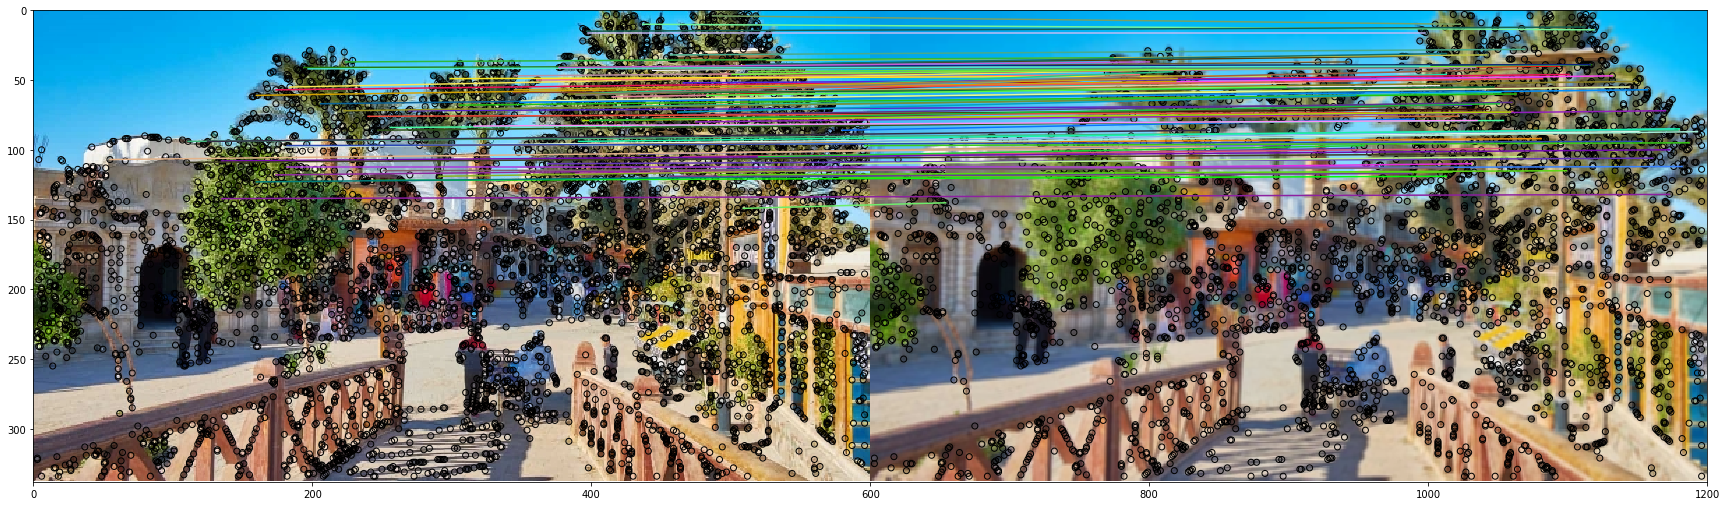

In [18]:
from skimage.feature import plot_matches

matches = match(d1,d2, cross_check=True)
print('no. of matches: ', matches.shape[0])

fig = plt.figure(figsize=(30.0, 50.0))
ax = fig.add_subplot(1,1,1)

plot_matches(ax, img1, img2, np.flip(keypoints1, 1), np.flip(keypoints2, 1), matches[:100])

### Chess Test

In [29]:
img1 = cv2.imread('images/chess2.jpg')
original_img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
gray1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)

t1 = time()
keypoints1 = FAST(gray1, N=9, threshold=0.15, nms_window=3)
print('me: ', time()-t1)

t4 = time()
d1 = BRIEF(gray1, keypoints1, mode='uniform', patch_size=64)
print('brief time: ', time()-t4)



img2 = cv2.imread('images/chess.jpg')
original_img = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

t1 = time()
keypoints2 = FAST(gray2, N=9, threshold=0.15, nms_window=3)
print('me: ', time()-t1)

t4 = time()
d2 = BRIEF(gray2, keypoints2, mode='uniform', patch_size=64)
print('brief time: ', time()-t4)

me:  0.5417275428771973
brief time:  0.011710166931152344
me:  11.138858795166016
brief time:  0.13932037353515625


no. of matches:  13


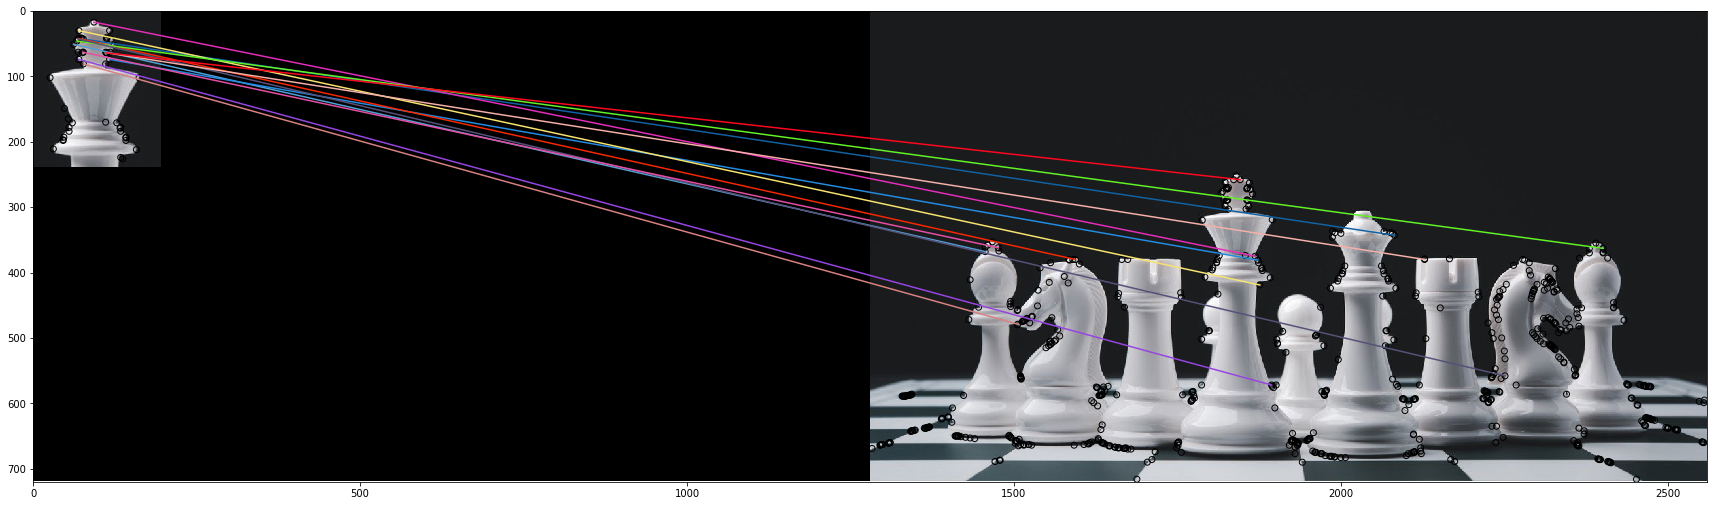

In [47]:
from skimage.feature import plot_matches

matches = match(d1,d2, cross_check=True)
print('no. of matches: ', matches.shape[0])

fig = plt.figure(figsize=(30.0, 50.0))
ax = fig.add_subplot(1,1,1)

plot_matches(ax, img1, img2, np.flip(keypoints1, 1), np.flip(keypoints2, 1), matches[:15])

no of matches:  93


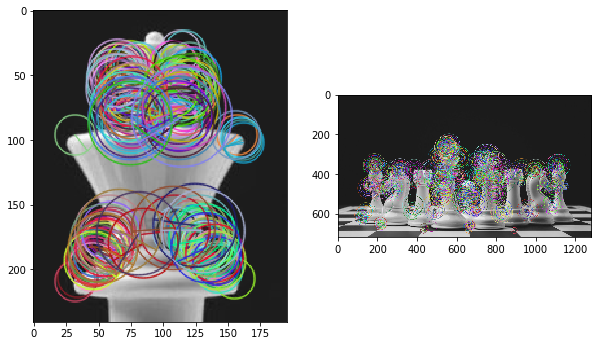

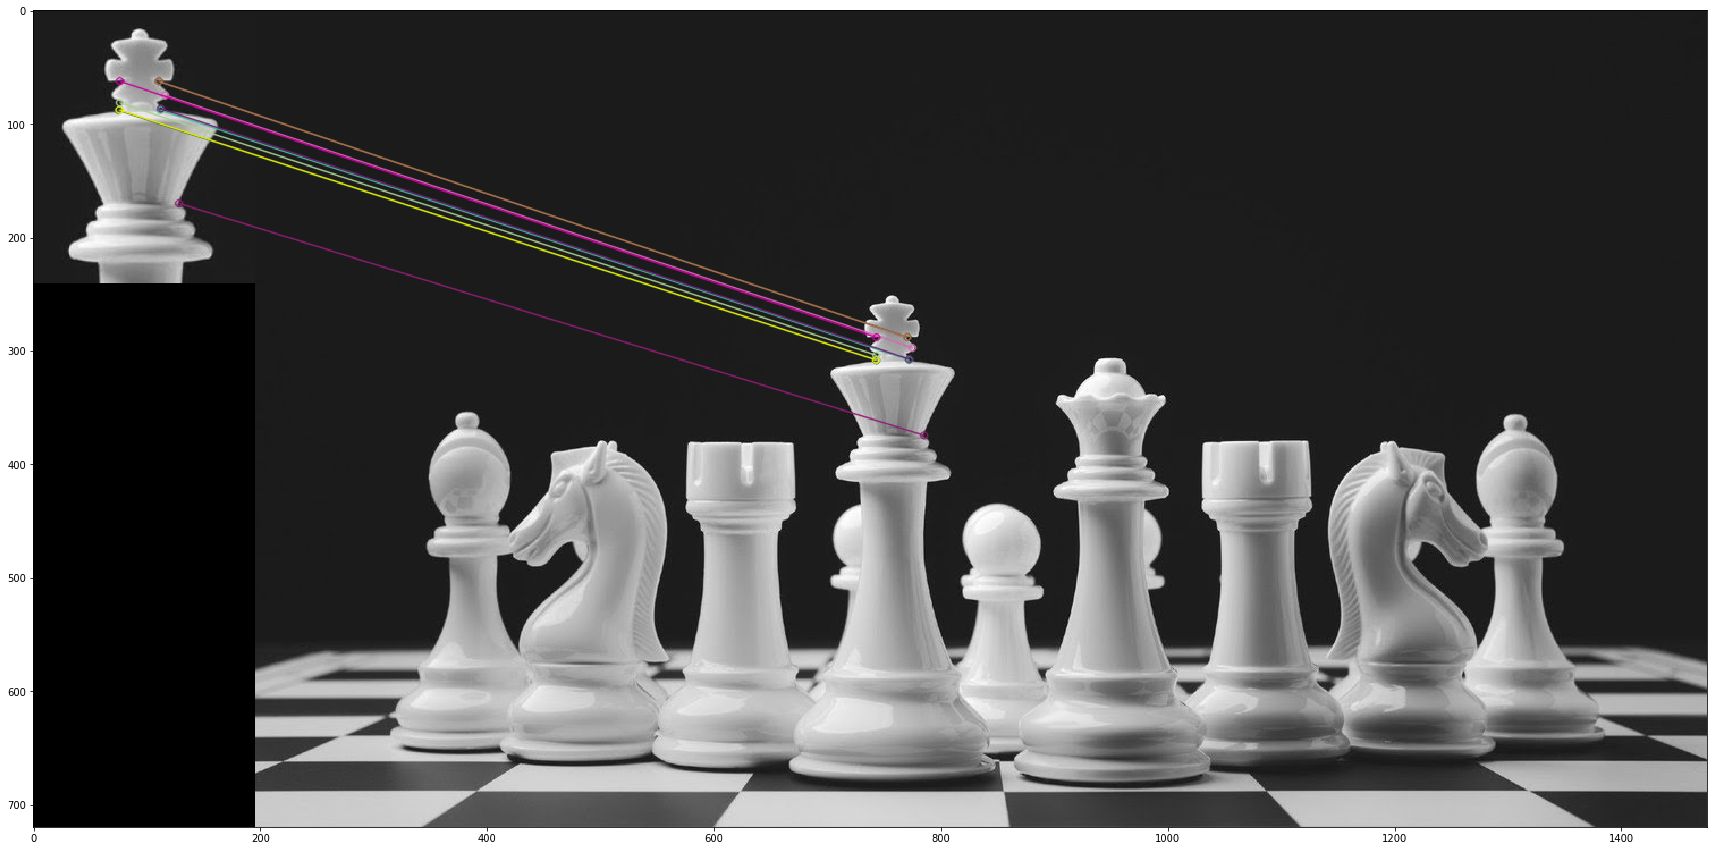

In [61]:
# Compare with OpenCV
orb = cv2.ORB_create(nfeatures=1000, scaleFactor=1.2)
# Train image
cv_kp1, cv_d1 = orb.detectAndCompute(gray1, None)

img1_draw = np.copy(img1)
cv2.drawKeypoints(gray1, cv_kp1, img1_draw, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# query image
cv_kp2, cv_d2 = orb.detectAndCompute(gray2, None)

img2_draw = np.copy(img2)
cv2.drawKeypoints(gray2, cv_kp2, img2_draw, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(10,40))
plt.subplot(1,2,1)
plt.imshow(img1_draw)
plt.subplot(1,2,2)
plt.imshow(img2_draw)

# Matching 
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
matches = bf.match(cv_d1, cv_d2)
matches = sorted(matches, key = lambda x : x.distance)
print('no of matches: ', len(matches))

matches_img = cv2.drawMatches(gray1, cv_kp1, gray2, cv_kp2, matches[:10], gray2, flags=2)
plt.figure(figsize=(30.0, 50.0))
plt.imshow(matches_img)

no. of matches:  17


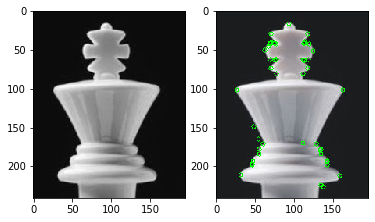

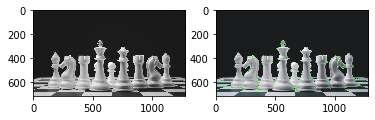

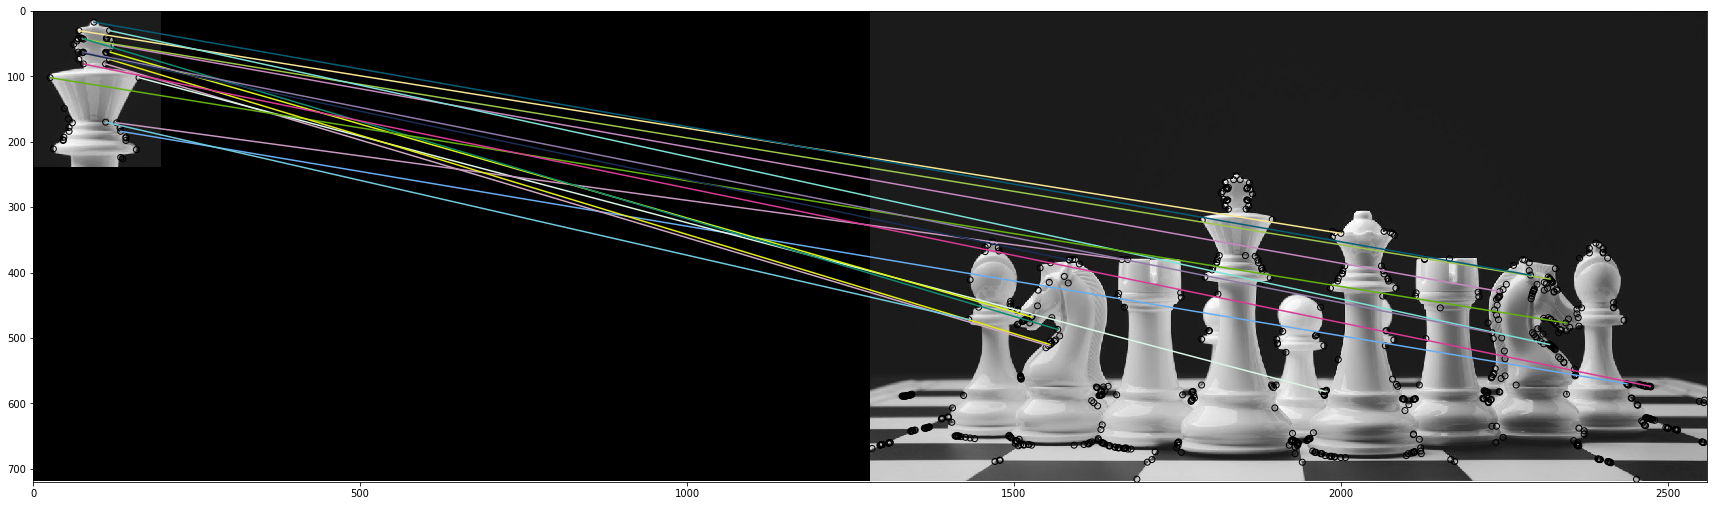

no. of matches:  11


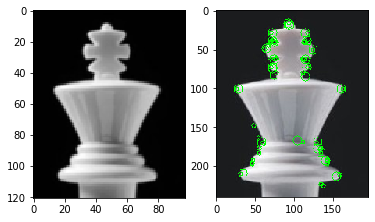

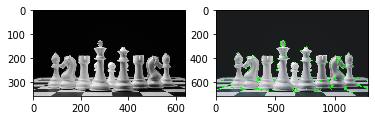

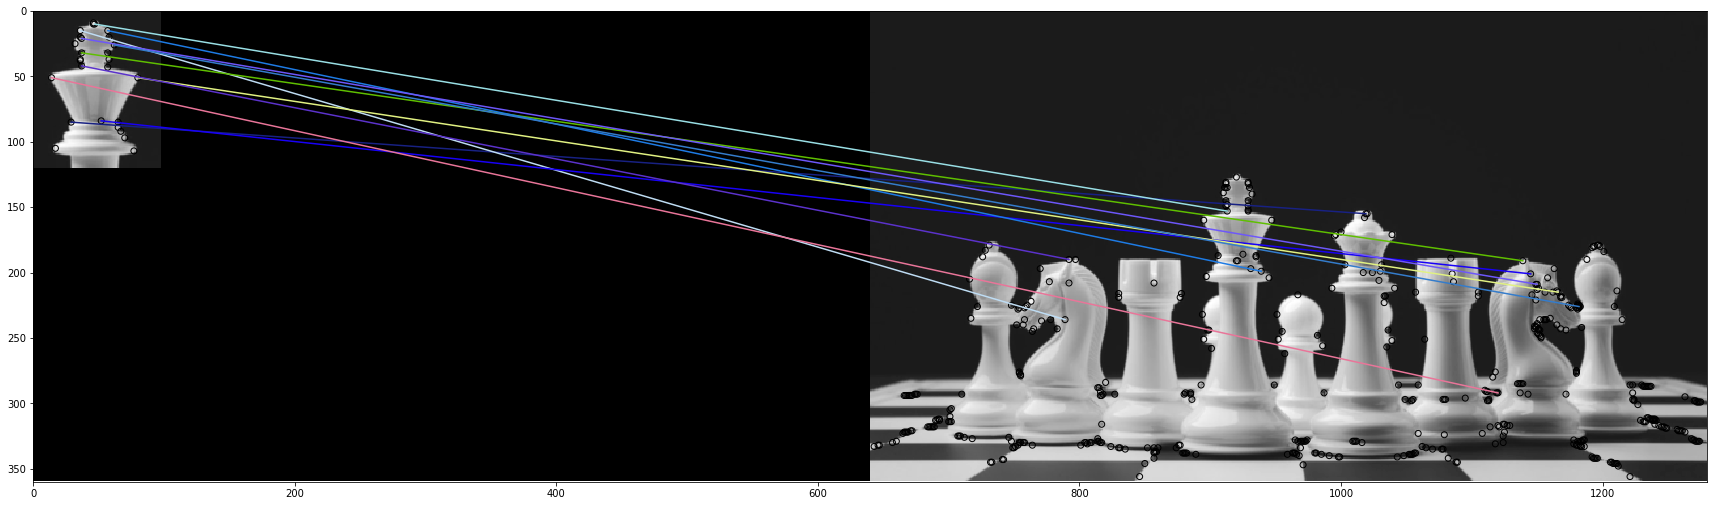

no. of matches:  6


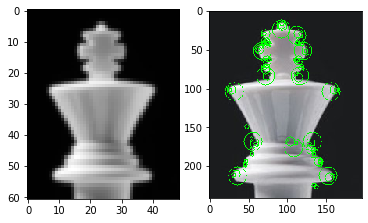

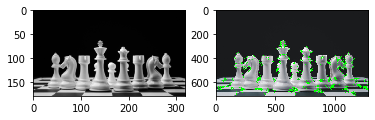

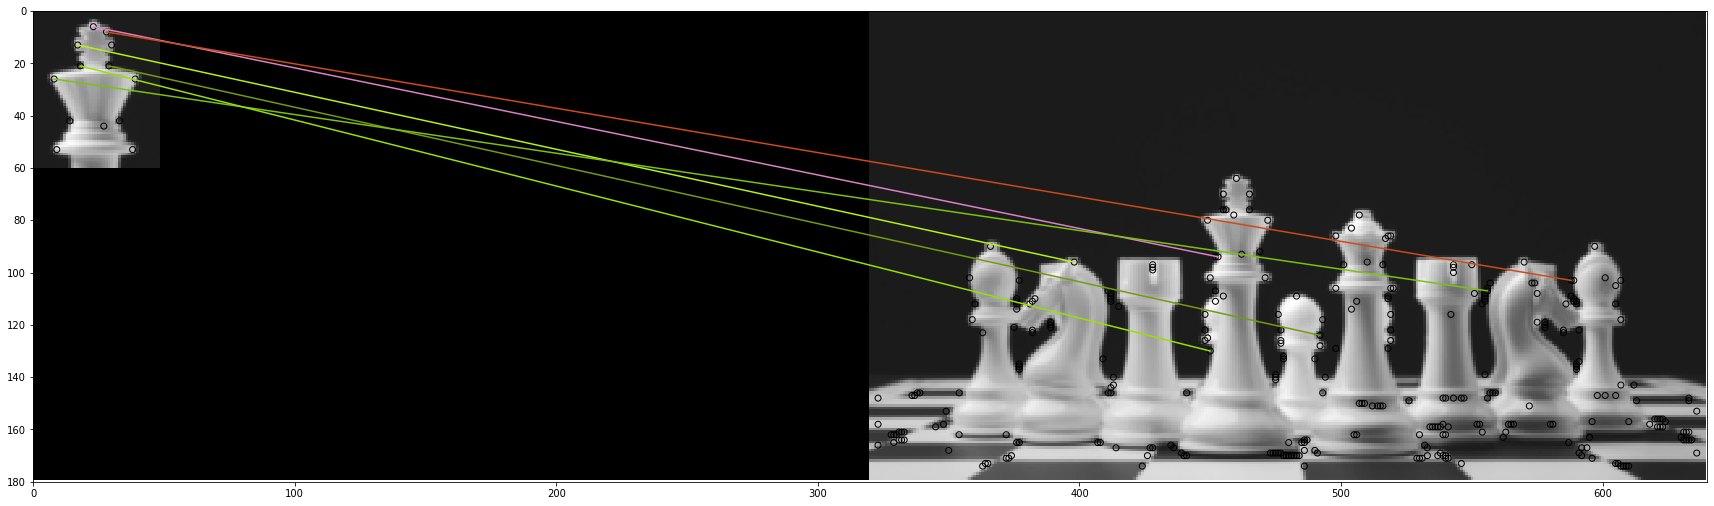

no. of matches:  4


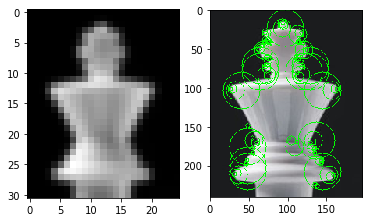

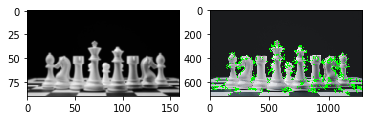

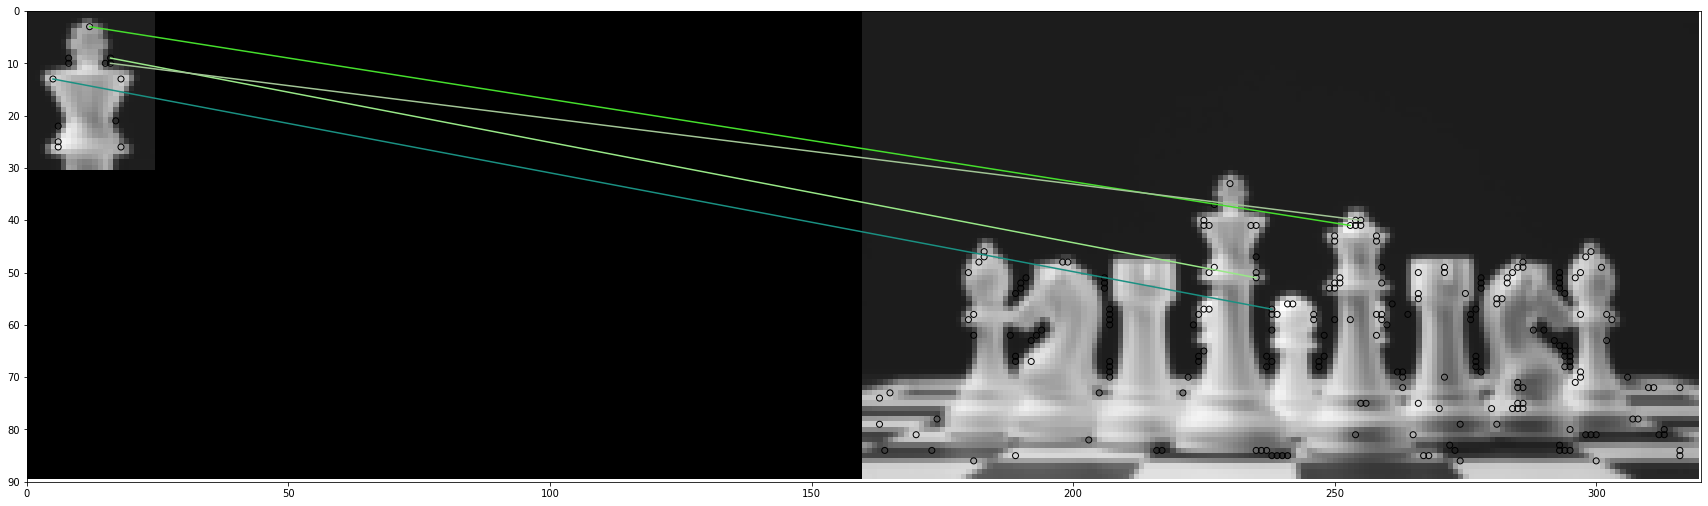

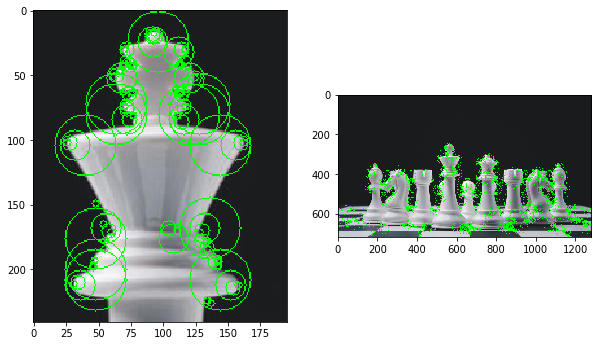

In [72]:
# Trying multi-scale
img1 = cv2.imread('images/chess2.jpg')
original_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
gray1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)

gray1_2 = cv2.pyrDown(gray1)
gray1_4 = cv2.pyrDown(gray1_2)
gray1_8 = cv2.pyrDown(gray1_4)


img2 = cv2.imread('images/chess.jpg')
original_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

gray2_2 = cv2.pyrDown(gray2)
gray2_4 = cv2.pyrDown(gray2_2)
gray2_8 = cv2.pyrDown(gray2_4)


scales = [1, 2, 4, 8]
grays1 = [gray1, gray1_2, gray1_4, gray1_8]
grays2 = [gray2, gray2_2, gray2_4, gray2_8]
features_img1 = np.copy(img1)
features_img2 = np.copy(img2)


kps1 = []
kps2 = []
ds1 = []
ds2 = []
ms = []
for i in range(len(scales)):
    scale_kp1 = FAST(grays1[i], N=9, threshold=0.15, nms_window=3)
    kps1.append(scale_kp1)
    scale_kp2 = FAST(grays2[i], N=9, threshold=0.15, nms_window=3)
    kps2.append(scale_kp2)
    for keypoint in scale_kp1:
        features_img1 = cv2.circle(features_img1, tuple(keypoint*scales[i]), 3*scales[i], (0,255,0), 1)
    for keypoint in scale_kp2:
        features_img2 = cv2.circle(features_img2, tuple(keypoint*scales[i]), 3*scales[i], (0,255,0), 1)
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(grays1[i], cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(features_img1)
    
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(grays2[i], cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(features_img2)
    
    d1 = BRIEF(grays1[i], scale_kp1, mode='uniform', patch_size=16, n=512)
    ds1.append(d1)
    d2 = BRIEF(grays2[i], scale_kp2, mode='uniform', patch_size=16, n=512)
    ds2.append(d2)
        
    matches = match(d1,d2, cross_check=True)
    ms.append(matches)
    print('no. of matches: ', matches.shape[0])

    fig = plt.figure(figsize=(30.0, 50.0))
    ax = fig.add_subplot(1,1,1)
    
    plot_matches(ax, grays1[i], grays2[i], np.flip(scale_kp1, 1), np.flip(scale_kp2, 1), matches)
    plt.show()
    
    
plt.figure(figsize=(10,30))
plt.subplot(1,2,1)
plt.imshow(features_img1)
plt.subplot(1,2,2)
plt.imshow(features_img2)


In [73]:
scale_kps1 = np.concatenate(kps1)
scale_kps2 = np.concatenate(kps2)

scale_ds1 = np.concatenate(ds1)
scale_ds2 = np.concatenate(ds2)

scale_ms = np.concatenate(ms)